In [ ]:
import torch
import numpy as np
from torch.utils.data import DataLoader, Dataset
from sklearn.preprocessing import MinMaxScaler

In [ ]:
class Dataset(Dataset):

    def __init__(self):
        self.data = np.load(para)
        self.unrelated_feature_number = unrelated_feature_number
        train_data = np.load("../data/features_rand_train.npy")

        # normalize
        mean = np.mean(train_data, axis=0)
        std = np.std(train_data, axis=0)
        self.data = (self.data-mean)/std

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        if self.s_or_d == "s":
            X_train = self.data[idx, :3]
        else:
            X_train = self.data[idx, 3:5]
            
        if self.unrelated_feature_number != 0:
            X_train = np.hstack((X_train,self.unrelated_feature[idx,:]))

        if self.train_or_test == "train":
            label_data = self.raw_data_train
        else:
            label_data = self.raw_data_test

        if self.s_or_d == "s":
            Y_train = label_data[idx, 1004]
        else:
            Y_train = label_data[idx, 1005]

        Y_train = np.array([Y_train])
        Y_train = Y_train.reshape((1,1))

        # 转为torch格式
        X_train = np.array([X_train])
        X_train = torch.from_numpy(X_train)
        Y_train = torch.from_numpy(Y_train)
        X_train = X_train.type(torch.FloatTensor)
        Y_train = Y_train.type(torch.FloatTensor)

        # Y_train = Y_train.view(Y_train.size(0), 1, 1)

        return X_train, Y_train

****************************loss is : tensor([1.9766e+08])
****************************loss is : tensor([94139448.])
****************************loss is : tensor([89980032.])
****************************loss is : tensor([59119236.])
****************************loss is : tensor([77434248.])
****************************loss is : tensor([79738000.])
****************************loss is : tensor([63523016.])
****************************loss is : tensor([95927984.])
****************************loss is : tensor([81350912.])
****************************loss is : tensor([72181848.])


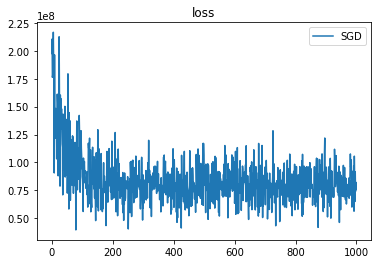

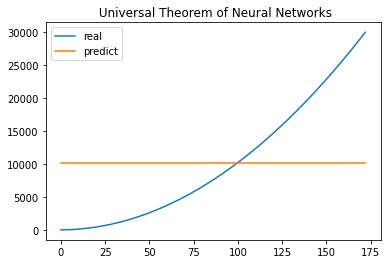

tensor([755838.4375, 755838.4375, 755838.3125, 755838.5625, 755838.1875,
        755838.3750, 755838.6875, 755838.9375, 755838.6250, 755838.3125]) tensor([5557.0195, 5559.0186, 5557.2422, 5557.7017, 5559.2866, 5557.4048,
        5557.6689, 5557.9429, 5558.8135, 5557.9302]) tensor([922.4882, 923.1854, 923.1452, 921.6785, 922.5018, 923.2015, 923.7238,
        924.1790, 921.5809, 921.5917]) tensor([928.1039])


In [4]:
import torch
from torch.autograd import Variable
from torch.utils import data
import matplotlib.pyplot as plt

neuron_num=10
batch=32
sample_num=300
learn_rating=0.001
epoch=1000


x_data=torch.linspace(0,172,sample_num)
#print(x_data)

torch.manual_seed(10)

def function(x):
  return x*2+x**2+3
y_real=function(x_data)
#print(y_real)




def sampling(sample_num):
   
    #print(data_size)
    index_sequense=torch.randperm(sample_num)
    return index_sequense

w=torch.rand(neuron_num)
b=torch.randn(neuron_num)
w2=torch.randn(neuron_num)
b2=torch.randn(1)
def activation_function(x):
    return 1/(1+torch.sigmoid(-x))



def hidden_layer(w,b,x):
    return activation_function(w*x+b)

def  fully_connected_layer(w2,b2,x):
    return torch.dot(w2,x)+b2

def net(w,b,w2,b2,x):
    #print("w",w)
    #print("b",b)
    o1=hidden_layer(w,b,x)
    #print("o1",o1)
    #print("w2",w2)
    #print("b2",b2)
    o2=fully_connected_layer(w2,b2,o1)
 #   print("o2",o2)

    return o2

def get_grad(w,b,w2,b2,x,y_predict,y_real):
  

    o2=hidden_layer(w,b,x)

    l_of_w2=-(y_real-y_predict)*o2
    l_of_b2=-(y_real-y_predict)
    l_of_w=-(y_real-y_predict)*torch.dot(w2,o2*(1-o2))*x
    l_of_b=-(y_real-y_predict)*torch.dot(w2,o2*(1-o2))
    #print("grad")
    #print(l_of_w)
    #print(l_of_w2)
    #print(l_of_b)
    #print(l_of_b2)
    return l_of_w2,l_of_b2,l_of_w,l_of_b

def loss_function(y_predict,y_real):
    #print(y_predict,y_real)
    return torch.pow(y_predict-y_real,2)
loss_list=[]


def train():
    global w,w2,b,b2
    index=0
    for i in range(epoch):
        
        index_sequense=sampling(sample_num)
   
        W_g=torch.zeros(neuron_num)
        b_g=torch.zeros(neuron_num)
        W2_g=torch.zeros(neuron_num)
        b2_g=torch.zeros(1)
        loss=torch.tensor([0.0])
           
        for k in range(batch):
              try:
                   # print("x",x_data[index],index)
                   # print("w",w)
                        y_predict=net(w,b,w2,b2,x_data[index_sequense[index]])
                        #print("y_predict",y_predict)
                        #print("x:",x_data[index_sequense[index]])
                        #print("yreal:",y_real[index_sequense[index]])
                        get_grad(w,b,w2,b2,x_data[index_sequense[index]],y_predict,y_real[index_sequense[index]])
                      
                        l_of_w2,l_of_b2,l_of_w,l_of_b= get_grad(w,b,w2,b2,x_data[index_sequense[index]],y_predict,y_real[index_sequense[index]])
                        W_g=W_g+l_of_w
                        b_g=b_g+l_of_b
                        b2_g=b2_g+l_of_b2
                        W2_g=W2_g+l_of_w2
                        loss=loss+loss_function(y_predict,y_real[index_sequense[index]])
                        index=index+1
                       

              except:
                        index=0
                        index_sequense=sampling(sample_num)
        if i % 100 == 0:
            print("****************************loss is :",loss/batch)
        loss_list.append(loss/batch)
     
        W_g=W_g/batch
        b_g=b_g/batch
        b2_g=b2_g/batch
        W2_g=W2_g/batch
        w=w-learn_rating*W_g
        b=b-learn_rating*b_g
        w2=w2-learn_rating*W2_g
        b2=b2-learn_rating*b2_g


train()

y_predict=[]
for i in range(sample_num):

  y_predict.append(net(w,b,w2,b2,x_data[i]))

epoch_list=list(range(epoch))
plt.plot(epoch_list,loss_list,label='SGD')
plt.title("loss")
plt.legend()

plt.show()

plt.plot(x_data,y_real,label='real')
plt.plot(x_data,y_predict,label='predict')
plt.title(" Universal Theorem of Neural Networks")
plt.legend()
plt.show()
print(w,b,w2,b2)

